In [28]:
import sys, getopt
import pandas as pd
import json
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import statsmodels.api as sm
matplotlib.rcParams['figure.figsize'] = [16,5]

In [29]:
period=90

inputfile="both_sexes.csv"
print('Input file is "', inputfile)
df = pd.read_csv(inputfile)
df = df.set_index(pd.DatetimeIndex(df['RecDate']))
df.sort_index(ascending=True, inplace=True)
df["Count"] = 1
df = df["Count"]

Input file is " both_sexes.csv


In [30]:
df = df.groupby("RecDate").count()

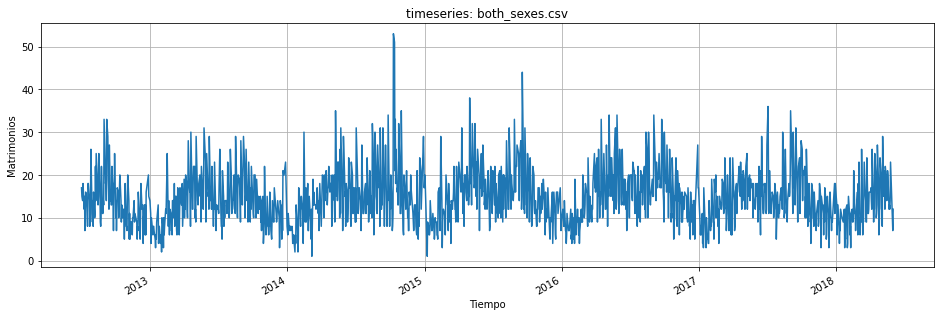

In [31]:
df.plot()
plt.title("timeseries: "+inputfile)
plt.xlabel("Tiempo")
plt.ylabel("Matrimonios")
plt.grid()
plt.show()

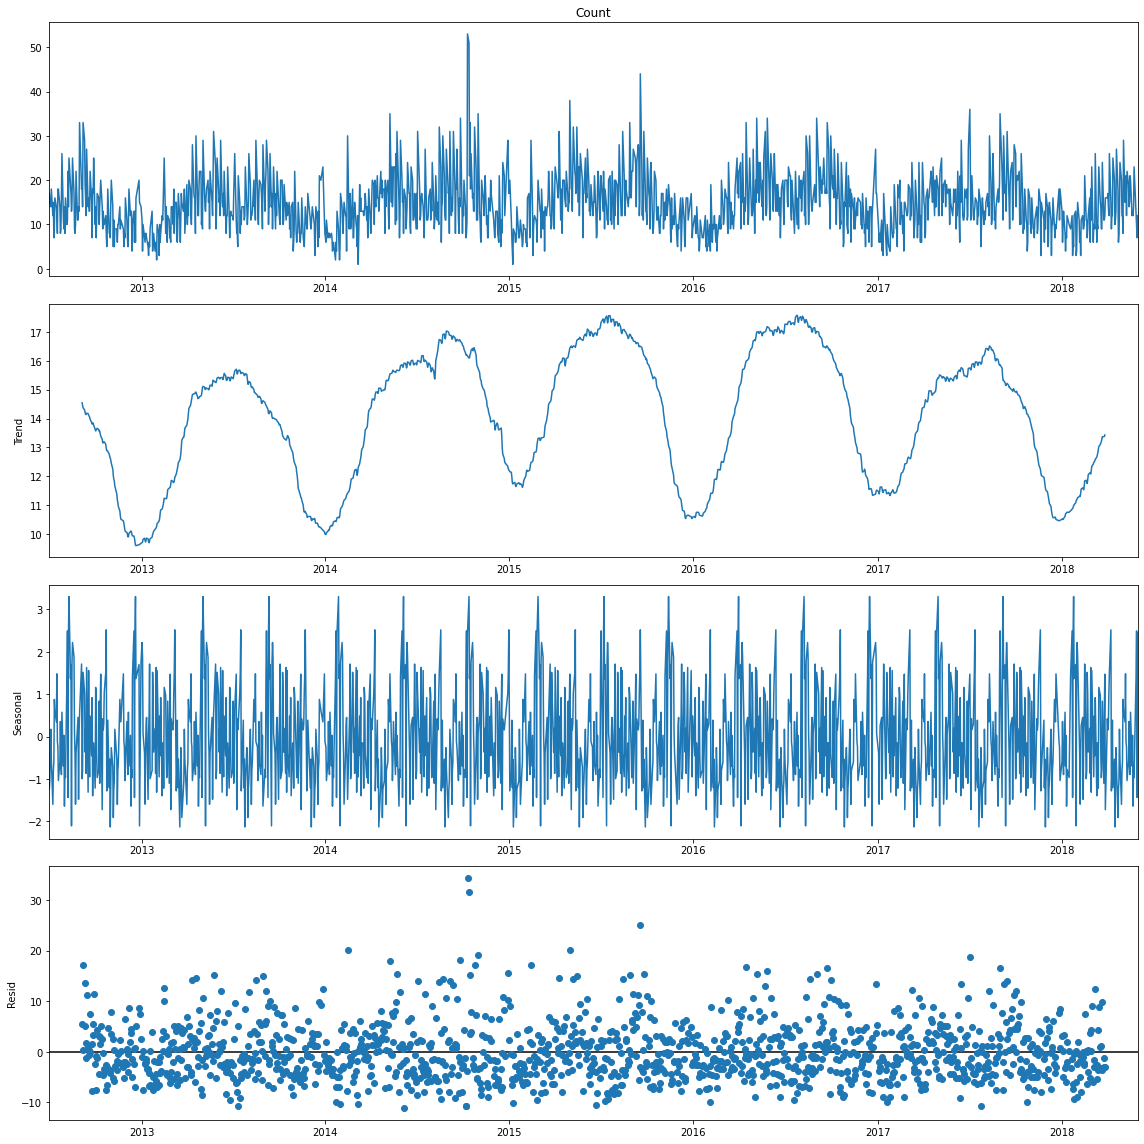

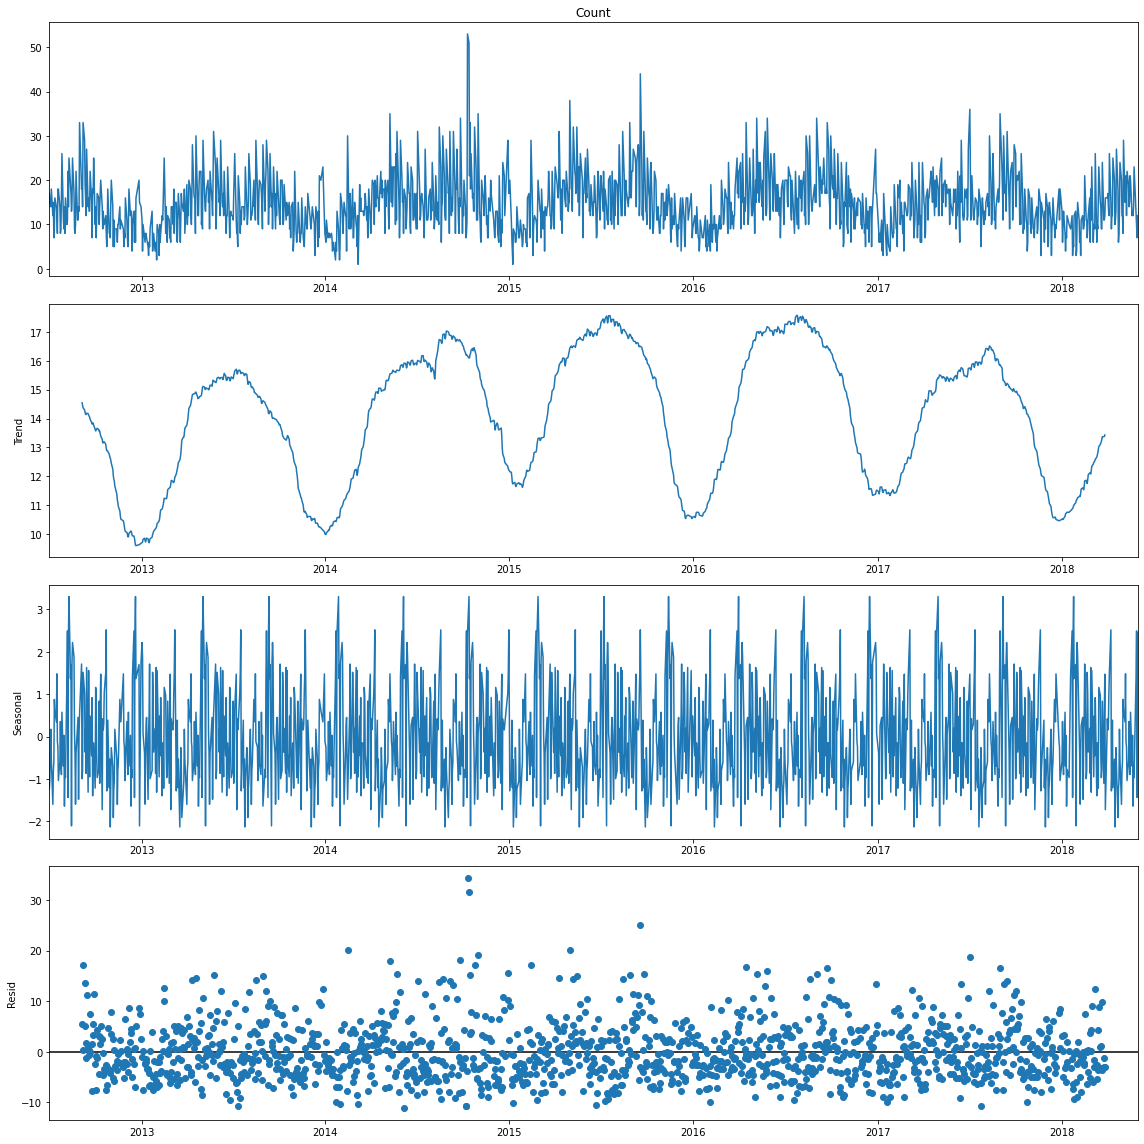

In [32]:
matplotlib.rcParams['figure.figsize'] = [16,16]
addit = sm.tsa.seasonal_decompose(df, model='additive', period=period)
addit.plot()

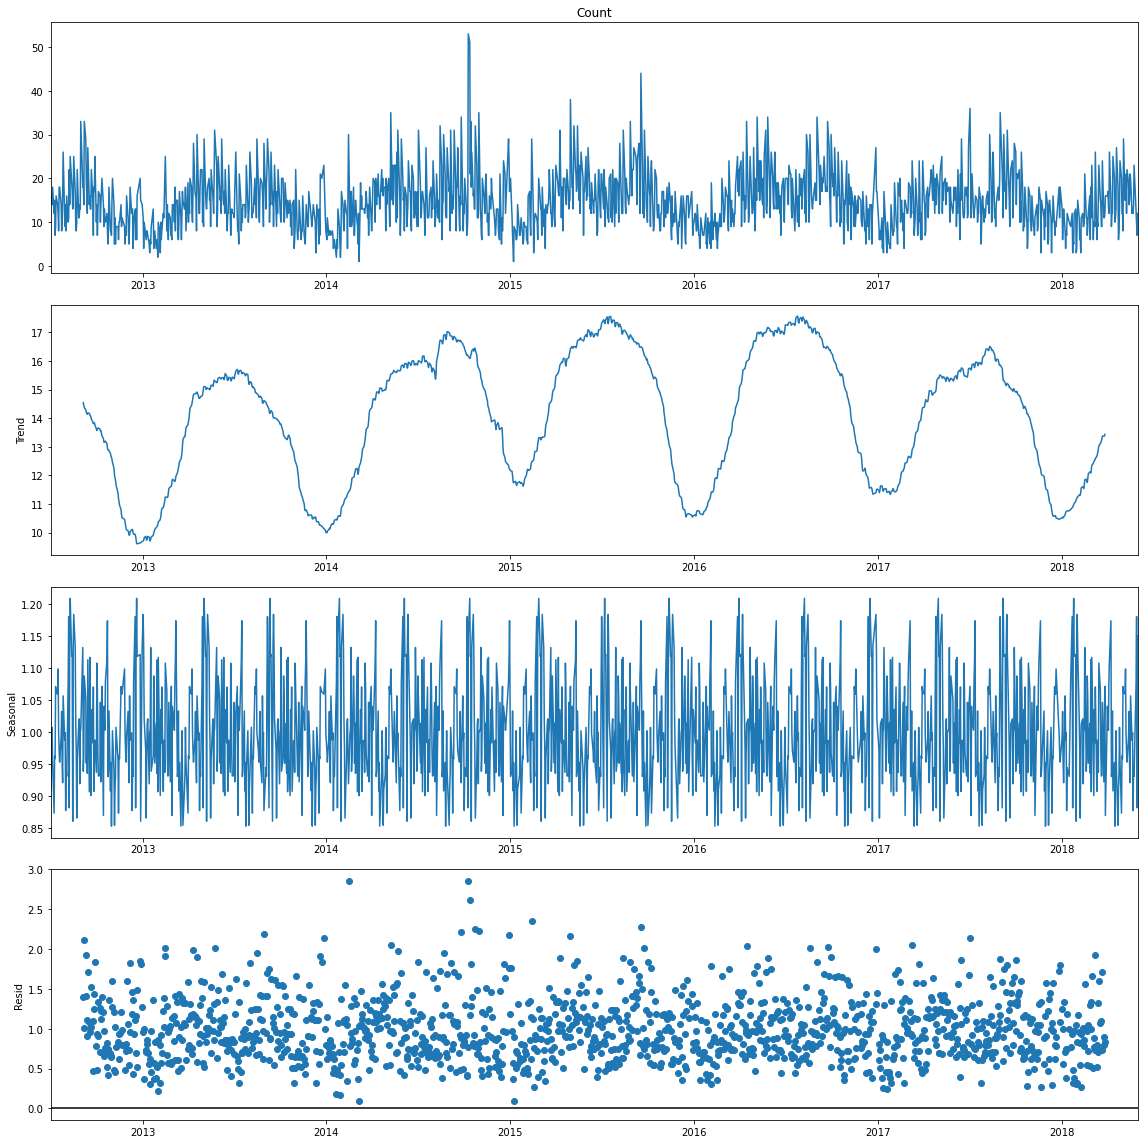

In [33]:
# Multiplicative
mult = sm.tsa.seasonal_decompose(df, model='multiplicative', period=period)
mult.plot(); plt.show()

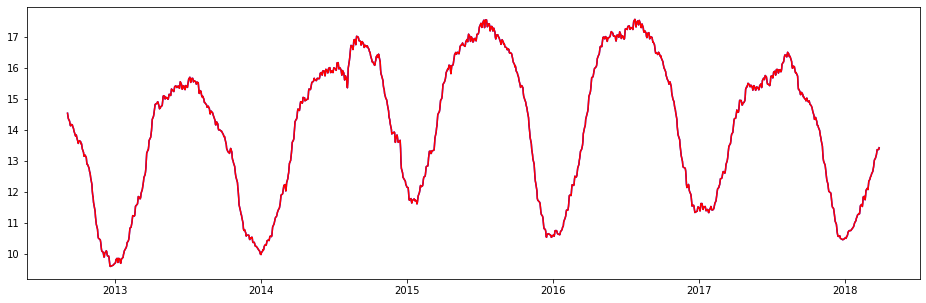

In [35]:
matplotlib.rcParams['figure.figsize'] = [16,5]
period=90
addit = sm.tsa.seasonal_decompose(df, model='additive', period=period)
mult = sm.tsa.seasonal_decompose(df, model='multiplicative', period=period)
plt.plot(addit.trend, color="blue")
plt.plot(mult.trend, color="red")
plt.show()